# 화장품 리뷰 데이터

## 1. 데이터 분석 목적성 및 수집

30,000개의 데이터를 6개의 카테고리로 분류하기

In [1]:
import pandas as pd

beauty = pd.read_excel('beauty_data_sample.xlsx')

In [2]:
beauty

,category,contents
0,감촉,사용감이좋아서 재구매하는것이구요한가지불편한것은화장품병뚜껑이헐거워병을 화장대에 떨어...
1,향기,크기도 들고다니기 적당하고 향도 너무 좋네요 . 늘 록시*만 썼었는데 갈아타야겠어...
2,가격,좋은제품 싸게 잘샀네요 최저가로 산듯
3,향기,향도 좋고 발색도 잘 됩니다.
4,가격,저렴하고 딱 좋아요 가성비 좋아요 저렴하고 딱 좋아요 저렴하고 딱 좋아요 저렴하...
...,...,...
29995,디자인,단델리온할까하다가 나이도 있고 피부톤도 어둡고해서 이제품을 택했는데..정말 이쁘고...
29996,디자인,디자인은 별하나 뺐어요~ 너무 이쁜데~ 제가 좋아하는 감촉이 아니라서? 이건 그런...
29997,디자인,선물 포장 너무 깔끔하고 예쁘고 무엇보다 배송에 신경 써주셔서 제 때에 선물할 ...
29998,디자인,언제나 이용하고 있습니다. 가격대비 추천합니다 ! 생각보다 좋은거 같아요. 잘 ...


## 2. 훈련 세트, 테스트 세트 분리

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(beauty.contents, beauty.category, test_size=0.2, stratify=beauty.category, random_state=0)

In [5]:
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (24000,)
X_test shape: (6000,)


In [6]:
X_train

748                                      빠른배송과 저렴한가격좋아요 ^^
4911     저렴한 가격에 사게 되어 좋습니다 아직 사용해보지 못했지만 잘 쓸것 같습니다 ㅎ 배...
28599    정말  예쁘고 좋습니다 . 하루 종일 화장을 안고쳐도  색이 그대로 남아 있고, 많...
24267    가을겨울이면 항상 쓰는제품이에요~ 흡수도 잘되고 끈적임없이  깔끔해요~얼굴 당김도 ...
22926    배송중은 빨리 떴는데 실제 받기까지는 오래 걸렸다는..ㅡㅡ 틴트는  이 제품이  맘...
                               ...                        
9684                                  저렴하게 산거 같아요 . 좋아요~^^
15414    화장이 오래가요 ~  흰색uv프라이머보다 고정력이좋아요  ,  살짝 건조한느낌은있지...
12704                              써봤던것 리필로 파니  저렴하고 좋네요 !
1397      팩트 향이 너무 좋네요  순수한 느낌이에요 벌써 매끈하고 깨끗한 피뷰를 기대해보네요  
25292    배송도 빠르고~~ 쓰던거라서 좋네요~~ㅋㅋ 양도많아서  오래 쓸 수 있어 좋아요~~...
Name: contents, Length: 24000, dtype: object

## 3. 훈련 세트의 Contents 값 자연어처리

### 데이터 세트의 매핑 테이블

In [7]:
import os
import sys
import logging
import re

_SCRIPT_DIR = os.path.abspath(os.path.dirname('__file__'))
sys.path.insert(0, os.path.abspath(_SCRIPT_DIR))

_KC_DIR = os.path.join(_SCRIPT_DIR, 'keyterm_client_py3')
sys.path.insert(0, os.path.abspath(_KC_DIR))

from keyterm_client_py3.keyterm_client import KeytermClient

kc = KeytermClient()

In [8]:
# 'AJMA',        # 형용사
# 'NNIN1',       # 고유명사
# 'NNIN2',       # 일반명사
# 'VBMA',        # 동사

split_sentence = []
split_sentence2 = []
for idx, contents in enumerate(X_train.values):
    data = kc.get_morphemes(body=contents, filter_option=['AJMA','NNIN1','NNIN2','VBMA'])
    split_sentence.append(data)
    split_sentence2.extend(data)

In [9]:
split_sentence

[['빠르다', '배송', '저렴하다', '가격', '좋다'],
 ['저렴하다', '가격', '사다', '좋다', '사용하다', '쓰다', '같다', '배송', '기다리다', '보람', '있다'],
 ['예쁘다',
  '좋다',
  '하루',
  '종일',
  '화장',
  '고치다',
  '색',
  '남다',
  '진하다',
  '부르주아',
  '화이트',
  '펄',
  '바르다',
  '이쁘다',
  '상품평',
  '보다',
  '구입하다',
  '되다',
  '배송료',
  '합치다',
  '백화점',
  '싸다',
  '도움',
  '되시길색',
  '밑에분',
  '말',
  '팥색',
  '같다',
  '한데',
  '연하다',
  '분홍',
  '펴바르',
  '쌍꺼풀',
  '라인',
  '바르다',
  '괜찮다'],
 ['가을',
  '겨울',
  '쓰다',
  '제품',
  '흡수',
  '잘되다',
  '끈적임',
  '없',
  '깔끔하다',
  '얼굴',
  '당기다',
  '없다',
  '아침',
  '비비',
  '크림',
  '섞다',
  '바르다',
  '촉촉하다',
  '넘',
  '좋다',
  '검색하다',
  '여기',
  '샘플도',
  '많다',
  '저렴하다',
  '구입하다',
  '트러블',
  '피부',
  '불구하다',
  '트러블',
  '없',
  '완전',
  '좋다',
  '제품',
  '양',
  '적다'],
 ['배송',
  '중',
  '뜨다',
  '실제',
  '받다',
  '걸리다',
  '틴트',
  '제품',
  '맘',
  '들다',
  '틴트',
  '같다',
  '않',
  '달라붙다',
  '느낌',
  '향',
  '좋다'],
 ['저렴하다',
  '가격',
  '구성',
  '살다',
  '있다',
  '좋다',
  '적극',
  '추천하다',
  '디자인',
  '이쁘다',
  '굿굿굿',
  '노랗다',
  '피부',
  '아이보리',
  '웜',
  '구입하다'],
 

In [10]:
split_sentence2

['빠르다',
 '배송',
 '저렴하다',
 '가격',
 '좋다',
 '저렴하다',
 '가격',
 '사다',
 '좋다',
 '사용하다',
 '쓰다',
 '같다',
 '배송',
 '기다리다',
 '보람',
 '있다',
 '예쁘다',
 '좋다',
 '하루',
 '종일',
 '화장',
 '고치다',
 '색',
 '남다',
 '진하다',
 '부르주아',
 '화이트',
 '펄',
 '바르다',
 '이쁘다',
 '상품평',
 '보다',
 '구입하다',
 '되다',
 '배송료',
 '합치다',
 '백화점',
 '싸다',
 '도움',
 '되시길색',
 '밑에분',
 '말',
 '팥색',
 '같다',
 '한데',
 '연하다',
 '분홍',
 '펴바르',
 '쌍꺼풀',
 '라인',
 '바르다',
 '괜찮다',
 '가을',
 '겨울',
 '쓰다',
 '제품',
 '흡수',
 '잘되다',
 '끈적임',
 '없',
 '깔끔하다',
 '얼굴',
 '당기다',
 '없다',
 '아침',
 '비비',
 '크림',
 '섞다',
 '바르다',
 '촉촉하다',
 '넘',
 '좋다',
 '검색하다',
 '여기',
 '샘플도',
 '많다',
 '저렴하다',
 '구입하다',
 '트러블',
 '피부',
 '불구하다',
 '트러블',
 '없',
 '완전',
 '좋다',
 '제품',
 '양',
 '적다',
 '배송',
 '중',
 '뜨다',
 '실제',
 '받다',
 '걸리다',
 '틴트',
 '제품',
 '맘',
 '들다',
 '틴트',
 '같다',
 '않',
 '달라붙다',
 '느낌',
 '향',
 '좋다',
 '저렴하다',
 '가격',
 '구성',
 '살다',
 '있다',
 '좋다',
 '적극',
 '추천하다',
 '디자인',
 '이쁘다',
 '굿굿굿',
 '노랗다',
 '피부',
 '아이보리',
 '웜',
 '구입하다',
 '바비',
 '브라운',
 '제품',
 '살다',
 '때',
 '큰맘',
 '먹다',
 '사다',
 '가격대비',
 '용량',
 '작다',
 '비싸다',
 '하지',
 '품질',

In [11]:
split_sentence_dup = list(set(split_sentence2))

mapping_table = {}
for idx, term in enumerate(split_sentence_dup):
    mapping_table[term] = idx

print(mapping_table)

{'편안하다': 0, '스위트': 1, '앍': 2, '미스': 3, '포송포송': 4, '한장만': 5, '뽀송해료': 6, '키튼카르다': 7, '구별하다': 8, '웜톰': 9, '기억하다': 10, '번들거림없': 11, '사놓자': 12, '나이대': 13, '푸른색': 14, '느긋히': 15, '것같지': 16, '별칭': 17, '넘이뽀요': 18, '올게오': 19, '강조하다': 20, '착달': 21, '상담하다': 22, '쨍하다': 23, '루즈팡': 24, '연하': 25, '부탁': 26, '바니다': 27, '떠러지다': 28, '저의': 29, '살돈': 30, '시데서': 31, '펄에갠적': 32, '빼다': 33, '대': 34, '모르겟고': 35, '필수템': 36, '힘들거': 37, '좋겄죠': 38, '봄볕': 39, '무색': 40, '글로즈': 41, '비싸다': 42, '사볼': 43, '불편': 44, '악지성': 45, '할게여': 46, '기다리셔': 47, '쿠션이라': 48, '눈두덩이': 49, '늦어시지': 50, '시러': 51, '중요': 52, '처음': 53, '안목': 54, '백업': 55, '요것': 56, '디당': 57, '무알콜': 58, '해지': 59, '투웨니스': 60, '순수': 61, '향빼고': 62, '기술': 63, '딥': 64, '거에용': 65, '약': 66, '팬다되다': 67, '과언': 68, '감귤향': 69, '어제시키다': 70, '토오': 71, '빛도는주황': 72, '상큼': 73, '뒤집어지다': 74, '문인지': 75, '막아주나': 76, '끝이네요': 77, '했으연': 78, '떳지': 79, '형광': 80, '문구': 81, '앙징': 82, '발라지는게': 83, '에이프릴': 84, '이런다고': 85, '벌꿀향': 86, '유명하다': 87, '여리': 88, '입생로랑': 89, '릅수': 90, '포토': 91, '다크

### 단어 빈도수 세기

In [12]:
# term_count = {}
# for idx, sentence in enumerate(split_sentence2):
#     term_count[sentence] = split_sentence2.count(sentence)

In [13]:
# term_count

In [14]:
# sorted_term_count = sorted(term_count.items(), key=lambda  x: x[1], reverse=True)
# sorted_term_count

In [15]:
# print(len(mapping_table))
# print(len(term_count))

In [16]:
# # mappint_table의 키 값 = term_count의 키 값 -> { 인덱스 : 개수 }
# count_mapping_table = {}
# for idx, mt in enumerate(mapping_table):
#     for jdx, tc in enumerate(term_count):    
#         if mt == tc:
#             count_mapping_table[idx] = term_count[tc]

# print(count_mapping_table)

In [17]:
# sorted_mapping_table = sorted(count_mapping_table.items(), key=lambda  x: x[1], reverse=True)
# sorted_mapping_table

In [18]:
# len(sorted_mapping_table)

### 워드 임베딩

#### Word2Vec

In [20]:
from gensim.models import Word2Vec
import numpy as np

# size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
# window = 컨텍스트 윈도우 크기(중심 단어를 예측하기 위해 앞, 뒤의 단어 범위)
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram.

# 차원 수를 5000으로 줄이기
# CBOW: 주변 단어를 이용해 타겟 단어를 예측
# Skip-gram: 타겟 단어를 이용해 주변 단어를 예측

# window 값은 한 줄의 평균 길이
length_sentence = []
for idx, sentence in enumerate(split_sentence):
    length_sentence.append(len(sentence))

np.mean(length_sentence)

12.970041666666667

In [21]:
# 평균 길이가 12개이므로 앞, 뒤로 나눠서 6개의 사이즈가 적절
model = Word2Vec(split_sentence,iter=3, negative=5, min_count=3, workers=4, sg=0)
model_name = 'beauty_model'
model.save(model_name)

In [52]:
# 텍스트에 해당되는 벡터
vectors = model.wv
vocabs = vectors.vocab.keys() # 대표 단어(중복 x)
print(len(vocabs))

4827


In [55]:
word_vectors_list = [vectors[v] for v in vocabs] # 대표 단어의 벡터값

In [213]:
len(word_vectors_list)

4827

In [214]:
pca1 = PCA(n_components=2)
xys_1 = pca1.fit_transform(word_vectors_list)
xs1 = xys_1[:, 0]
ys1 = xys_1[:, 1]

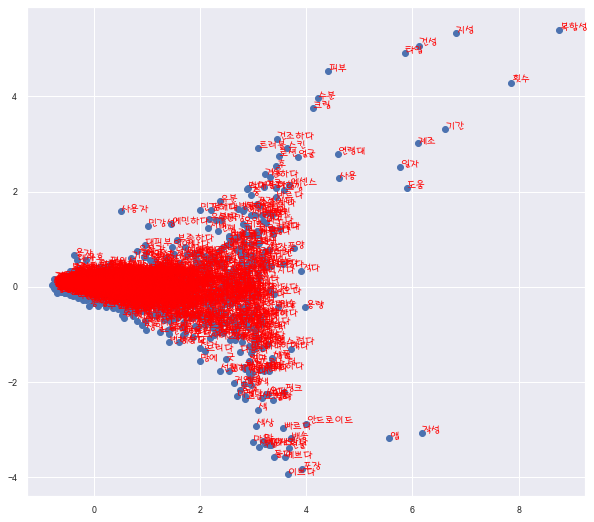

In [215]:
plot_2d_graph(vocabs, xs1, ys1)

### 데이터 스케일링

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_word_vectors_list = scaler.fit_transform(word_vectors_list)

print(np.mean(scaled_word_vectors_list))
print(np.var(scaled_word_vectors_list))
print(np.std(scaled_word_vectors_list))

-7.93509309085724e-19
0.9999999999999997
0.9999999999999998


### 데이터 시각화

In [73]:
target_names = list(set(y_train.values))
print(target_names)

['향기', '용량', '색상', '가격', '디자인', '감촉']


In [196]:
# 차원 축소 사용(PCA)
from sklearn.decomposition import PCA

pca = PCA()
pca_reduced = pca.fit_transform(scaled_word_vectors_list)
pca_reduced.shape

(4827, 256)

In [197]:
pca.explained_variance_ratio_

array([5.26937415e-01, 1.54612124e-01, 1.36311934e-01, 8.31183237e-02,
       4.43554047e-02, 2.39966042e-02, 1.00828000e-02, 7.44749691e-03,
       4.70313039e-03, 2.77983859e-03, 1.86127482e-03, 1.54961694e-03,
       8.07942318e-04, 1.71771376e-04, 1.61025428e-04, 1.14727140e-04,
       9.15643763e-05, 8.35300072e-05, 7.91014808e-05, 5.30169387e-05,
       4.15907897e-05, 3.21528738e-05, 2.67594922e-05, 2.56536820e-05,
       2.19644776e-05, 2.00797477e-05, 1.72469703e-05, 1.63004687e-05,
       1.34814124e-05, 1.25540392e-05, 1.20625338e-05, 1.14165473e-05,
       1.10009492e-05, 1.02588022e-05, 9.81437904e-06, 9.02327399e-06,
       8.35343753e-06, 7.38742100e-06, 7.01172398e-06, 6.86633054e-06,
       6.78365343e-06, 6.41723790e-06, 6.24251734e-06, 6.04705049e-06,
       5.90752401e-06, 5.65234477e-06, 5.58801964e-06, 5.23060406e-06,
       5.08432063e-06, 5.04428585e-06, 4.79490360e-06, 4.62952618e-06,
       4.58755718e-06, 4.49894052e-06, 4.30602118e-06, 4.26873105e-06,
      

In [198]:
# 95%의 분산을 보존하면서 원하는 PCs(주성분) 구하기
pca.explained_variance_ratio_.cumsum()

array([0.52693742, 0.68154954, 0.81786147, 0.9009798 , 0.9453352 ,
       0.96933181, 0.97941461, 0.9868621 , 0.99156523, 0.99434507,
       0.99620635, 0.99775596, 0.99856391, 0.99873568, 0.9988967 ,
       0.99901143, 0.99910299, 0.99918652, 0.99926563, 0.99931864,
       0.99936023, 0.99939239, 0.99941915, 0.9994448 , 0.99946676,
       0.99948684, 0.99950409, 0.99952039, 0.99953387, 0.99954643,
       0.99955849, 0.99956991, 0.99958091, 0.99959116, 0.99960098,
       0.99961   , 0.99961836, 0.99962574, 0.99963276, 0.99963962,
       0.99964641, 0.99965282, 0.99965906, 0.99966511, 0.99967102,
       0.99967667, 0.99968226, 0.99968749, 0.99969257, 0.99969762,
       0.99970241, 0.99970704, 0.99971163, 0.99971613, 0.99972044,
       0.9997247 , 0.99972885, 0.99973295, 0.99973693, 0.99974083,
       0.99974461, 0.99974825, 0.99975187, 0.99975541, 0.99975889,
       0.99976232, 0.99976571, 0.99976907, 0.99977232, 0.99977552,
       0.99977868, 0.99978179, 0.99978483, 0.99978784, 0.99979

선택할 차원 수:  6


In [200]:
# 위에서 구한 식을 통해 6개의 주성분을 추출할 수 있다
pca_data = pca_reduced[:, :6]
pca_data.shape

(4827, 6)

In [201]:
# 차원 축소를 한 새로운 데이터프레임 생성
pca_df = pd.DataFrame(pca_data, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])

In [203]:
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6
0,43.879275,-48.454761,24.172049,-20.997714,-21.098120,-19.292082
1,43.652125,-55.571378,43.642465,-20.520680,-21.968912,-17.401087
2,39.033965,-34.664048,52.813178,-17.390762,10.022138,-7.323462
3,39.934192,-29.423047,41.034723,-24.140471,12.498810,-6.050091
4,35.492678,-0.611865,-14.149611,-28.242183,-14.182937,-13.093492
...,...,...,...,...,...,...
4822,-7.875881,0.367958,0.184026,-0.395063,-0.180229,-0.085956
4823,-8.048069,-2.036370,-0.340768,-0.421378,-0.024047,-0.285947
4824,-7.624727,0.342539,0.548336,-0.092159,0.032390,-0.043939
4825,-7.657836,0.726950,0.094179,0.546725,-0.014696,-0.028781


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/Gaesung.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(10, 9))
    plt.scatter(xs, ys, marker='o')
    
    for i, v in enumerate(vocabs):
        plt.annotate(v, 
                     xy=(xs[i], ys[i]), 
                     fontsize=10,
                     fontproperties=fontprop)

xs = reduced_tsne[:, 0]
ys = reduced_tsne[:, 1]

In [225]:
pca2 = PCA(n_components=6)
xys_2 = pca2.fit_transform(scaled_word_vectors_list)

In [226]:
xys_2.shape

(4827, 6)

In [240]:
pc1 = xys_2[:, 0]
pc2 = xys_2[:, 1]
pc3 = xys_2[:, 2]
pc4 = xys_2[:, 3]
pc5 = xys_2[:, 4]
pc6 = xys_2[:, 5]

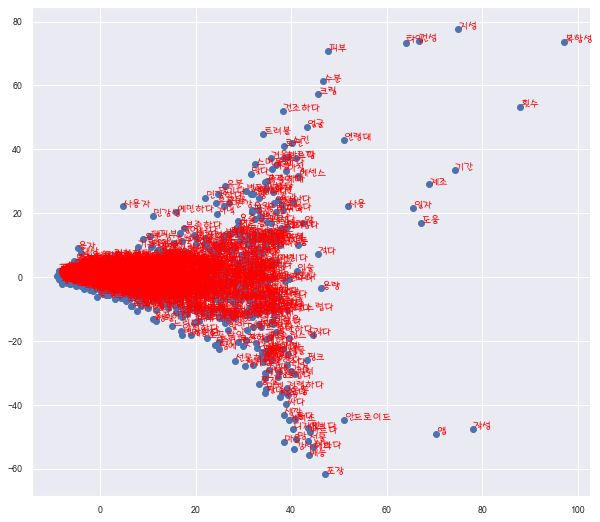

In [241]:
plot_2d_graph(vocabs, pc1, pc2)

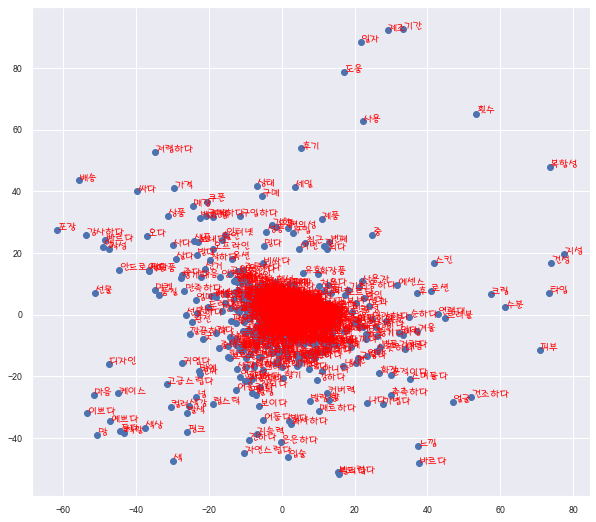

In [242]:
plot_2d_graph(vocabs, pc2, pc3)

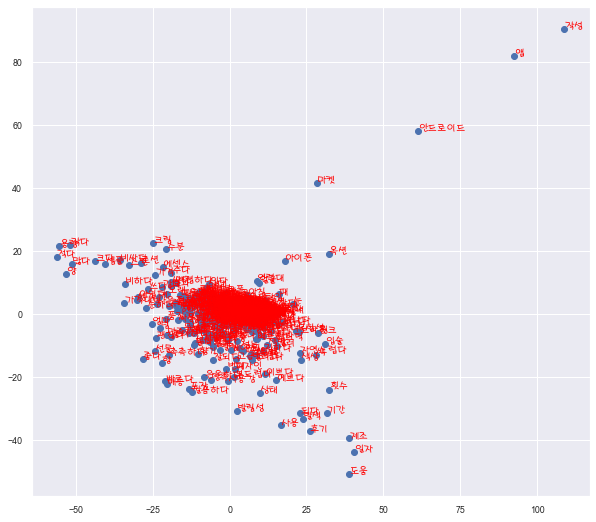

In [243]:
plot_2d_graph(vocabs, pc4, pc5)

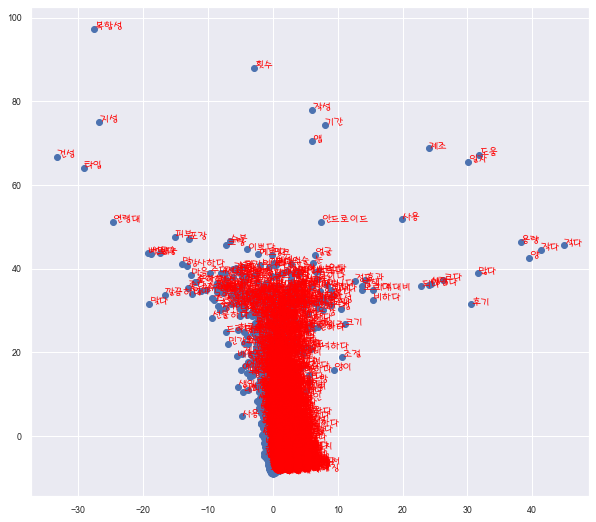

In [244]:
plot_2d_graph(vocabs, pc6, pc1)

In [135]:
# 타겟 데이터프레임 생성
target_mapping_table = {}
for idx, names in enumerate(target_names):
    target_mapping_table[names] = idx

beauty_target_df = pd.DataFrame(columns=['target'])

for idx, target in enumerate(y_train.values):
    for key, value in target_mapping_table.items():
        if target == key:
            beauty_target_df.loc[idx, 'target'] = value

beauty_target_df = beauty_target_df.astype(int)

In [205]:
beauty_target_df

,target
0,3
1,3
2,4
3,1
4,0
...,...
23995,3
23996,2
23997,3
23998,0


In [145]:
# # 히트맵으로 상관관계 확인
# plt.figure(figsize=(15, 15))
# cmap = sns.light_palette("red", as_cmap=True)
# sns.set(font_scale=0.8)
# sns.heatmap(pca_df.corr(), annot=True, cmap=cmap)
# plt.show()

In [155]:
word_list = []
for voca in vocabs:
    word_list.append(voca)

X = word_list
y = scaled_word_vectors_list

In [158]:
plt.plot(X, y)

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48736 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49569 missing f

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44192 missing f

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54057 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50583 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48764 missing f

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51596 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47800 missing f

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44059 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52884 missing f

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47484 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44928 missing f

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53097 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51025 missing f

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50771 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50056 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50532 missing f

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51086 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51984 missing f

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50739 missing f

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51424 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 51216 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52286 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 49556 missing from c

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 46472 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46028 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45132 missing from c

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47805 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 53952 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 46020 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48961 missing fro

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47579 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47480 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51901 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44264 missing from curr

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45776 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 53076 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53948 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 53944 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 44275 missing fro

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 48145 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48121 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45331 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 49916 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44596 missing fro

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50648 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 48150 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46385 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45230 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53444 missing from c

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 44208 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48036 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 52384 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52326 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46244 missing fro

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54589 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54635 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 49496 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47160 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 50136 missing from c

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 49913 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 53804 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47200 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45912 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 45128 missing fro

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 49440 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 51228 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50581 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 54952 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47589 missing 

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51453 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 51080 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54637 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 44036 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44064 missing fro

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46360 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47092 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50784 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 45208 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 44032 missing from c

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47699 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46532 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 49885 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50517 missing from c

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 46028 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 54060 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 44053 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 53224 missing 

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46317 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46168 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 51232 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 47592 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 51089 missing fro

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50052 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 51104 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 48808 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 45432 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 49829 missing 

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 54588 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 48169 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50679 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 49457 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 46497 missing 

Error in callback <function flush_figures at 0x000002ACE48BBDC8> (for post_execute):


KeyboardInterrupt: 

In [159]:
word_embeddings = pd.DataFrame(X, y)

In [162]:
word_embeddings.values

array([['빠르다'],
       ['배송'],
       ['저렴하다'],
       ...,
       ['이좀'],
       ['그색이'],
       ['촛촉']], dtype=object)

In [165]:
for idx, word in enumerate(word_embeddings.values):
    for key, value in mapping_table.items():
        if word == key:
            word_embeddings.values[idx] = value
            
word_embeddings.values

array([[16205],
       [7396],
       [11910],
       ...,
       [15299],
       [13515],
       [10290]], dtype=object)

In [166]:
word_embeddings.index

Float64Index([    -4.519463912309981,    -4.1169058117719075,
                  -5.126540195265833,      6.386758581017409,
                 -6.8402546164883375,      7.997056325702069,
                  -7.373912089484393,    -2.6391214132834917,
                  -4.801371601610374,     -3.494728987042458,
                  -2.321943329875255,    -11.323110071133529,
                   -6.97217225192604,      7.396429775134354,
                  -5.902967752540201,      5.227649311143183,
                 -0.7069765358142803,    -0.5541774103345796,
                  11.074113275462354,       2.48924142312125,
                 -10.943598434999599,    -10.100653561998953,
                  -6.087523947208477,     -3.609519770608589,
                 -0.6075850262236997,     -6.167074749656936,
                  10.558906766868212,      4.135396514044787,
                0.022351294776967925,     -6.440223515042864,
                 0.36314431078706294,     3.3363756180405613,
        

In [179]:
from sklearn.manifold import TSNE

X = word_embeddings.values # 단어
y = word_embeddings.index # 단어 벡터

tsne = TSNE(random_state=0)
reduced_tsne = tsne.fit_transform(X)

In [189]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/Gaesung.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(10, 9))
    plt.scatter(xs, ys, marker='o')
    
    for i, v in enumerate(vocabs):
        plt.annotate(v, 
                     xy=(xs[i], ys[i]), 
                     fontsize=10,
                     fontproperties=fontprop)

xs = reduced_tsne[:, 0]
ys = reduced_tsne[:, 1]

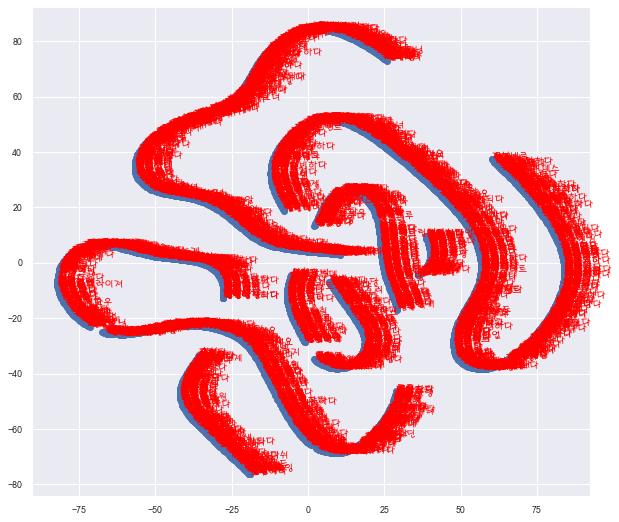

In [190]:
plot_2d_graph(vocabs, xs, ys)

## 4. 모델 선택과 훈련

### 로지스틱 회귀, 서포트벡터머신, 의사결정나무, 랜덤포레스트

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 선택
lin_reg = LogisticRegression()
svm = SVC()
decs_clf = DecisionTreeClassifier()
rnd_clf = RandomForestClassifier()

In [194]:
test_split_sentence = []
test_split_sentence2 = []
for idx, contents in enumerate(X_test.values):
    data = kc.get_morphemes(body=contents, filter_option=['AJMA','NNIN1','NNIN2','VBMA'])
    test_split_sentence.append(data)
    test_split_sentence2.extend(data)

In [195]:
test_split_sentence_dup = list(set(test_split_sentence2))

test_mapping_table = {}
for idx, term in enumerate(test_split_sentence_dup):
    test_mapping_table[term] = idx

print(test_mapping_table)

{'편안하다': 0, '미스': 1, '프로그래밍': 2, '기억하다': 3, '번들거림없': 4, '썻어여': 5, '쨍하다': 6, '부탁': 7, '최도': 8, '빼다': 9, '대': 10, '블로거들': 11, '모르겟고': 12, '앙씨엔느': 13, '무색': 14, '비싸다': 15, '뭐맞겟죠': 16, '사볼': 17, '보겟': 18, '충족시키다': 19, '불편': 20, '좋았네욤': 21, '할게여': 22, '눈두덩이': 23, '헤어샵': 24, '돼겠네요': 25, '중요': 26, '처음': 27, '게더': 28, '요것': 29, '티내기용': 30, '해지': 31, '투웨니스': 32, '거뜬할꺼': 33, '약': 34, '어제시키다': 35, '테크': 36, '뒤집어지다': 37, '형광': 38, '문구': 39, '유명하다': 40, '여리': 41, '고가랑': 42, '입생로랑': 43, '저빙': 44, '다크써클': 45, '송이': 46, '본결': 47, '시카': 48, '글리세린': 49, '감동했': 50, '기뻐하다': 51, '라놀': 52, '뉴트럴': 53, '비르니': 54, '쉐도우': 55, '셀라피': 56, '톡쏘': 57, '잇지': 58, '공진향': 59, '세럼': 60, '핑베라길래': 61, '고등학교': 62, '배송일단': 63, '아니엿구요': 64, '많': 65, '부드러버요': 66, '반갑다': 67, '딥해서': 68, '세일러문': 69, '개당': 70, '쟁여놓': 71, '지급': 72, '오휘걸': 73, '이자': 74, '아이폰': 75, '엑스트라': 76, '은색': 77, '잘삿': 78, '나왓는데': 79, '구매': 80, '핑': 81, '어': 82, '태연': 83, '배색': 84, '상큼항': 85, '이틀': 86, '드나': 87, '향도순': 88, '들어요다': 89, '색도넘이뻐요': 90, '조그마하다': 91

In [ ]:
X = xs
y = ys

In [193]:
# 위의 분류 모델들의 분류 성능 평가 확인하기(샘플 데이터로)
from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             classification_report,
                             roc_curve)

def sample_performance_score(model, X, y):

    model.fit(X, y)

    # 몇 개의 샘플로 성능 측정
    y_true = y_test[:150]
    y_pred = model.predict(X_test[:150])

    print("Confusion matrix: \n{}".format(confusion_matrix(y_true, y_pred)))
    print("Accuracy score: {}".format(accuracy_score(y_true, y_pred)))
    print("Precision score: {}".format(precision_score(y_true, y_pred)))
    print("Recall score: {}".format(recall_score(y_true, y_pred)))
    print("F1 score: {}".format(f1_score(y_true, y_pred)))
    print("\n")

# 로지스틱 회귀
print("[로지스틱 회귀]")
sample_performance_score(lin_reg, X_train, y_train)

# SVM
print("[SVM]")
sample_performance_score(svm, X_train, y_train)

# 의사결정트리
print("[의사결정트리]")
sample_performance_score(decs_clf, X_train, y_train)

# 랜덤포레스트
print("[랜덤포레스트]")
sample_performance_score(rnd_clf, X_train, y_train)

[로지스틱 회귀]


ValueError: could not convert string to float: '빠른배송과 저렴한가격좋아요 ^^'

In [ ]:
# 위의 모델들의 성능 측정
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# 교차 검증을 위해
kfold = KFold(n_splits=10, shuffle=True, random_state=0) # stratified cross-validation

lin_reg_scores = cross_val_score(lin_reg, 
                                 sample_test, 
                                 sample_target, 
                                 scoring="neg_mean_squared_error", 
                                 cv=kfold)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)

print(lin_reg_rmse_scores)